# ANALYSIS OF AIR POLLUTION DATA  

## TABLE OF CONTENT

> **INTRODUCTION**

> **DATA WRANGLING**

> **EXPLORATORY DATA ANALYSIS (EDA)**

> **CONCLUSION**



## INTRODUCTION

### DATASET DESCRIPTION

> The data was downloaded from the Global Health Data Exchange website [link](https://ghdx.healthdata.org/gbd-2019), it is on the particulate matter air pollution, recorded from 1990 to 2019. In recent times there has been a lot of talk on the health risk of air pollution, the air pollutant with  the greatest health hazard is the **particulate matter (PM)**, PM comes in two major sizes PM 10 ( diameter of 10 micrometers) , and PM 2.5 ( diameter of 2.5 micrometers). 

>Some of the **health consequencies** of exposure to PM includes _increase in adverse cardiovascular events_, _increase respiratory illness especially in susceptible groups (Asthma & COPD patients)_, _increase in hospital admission_, _increase in mortality_, _reduced life expectancy_. 


### There are three (3) csv files

### FIRST CSV FILE

### The first csv file (air_pollution.csv) contains 12 unique features 
> **_measure_id_** : this identifies the specific air pollutant being measured by the sensor (NB: Most sensor measure several other pollutants at same time), since the data was only for particulate matter, the measure_id was same for all the enteries

>**measure_name** : this describes the kind of data collected by the sensor , whether discrete or continous

>**location_id** :  this identifies which location the sensor was taking the reading is taken from ( even within same country there more than location where air-quality is meausred) 

>**location_name** : this identifies which country the reading is taken from

>**rei_id** & **rei_name** : this describes which type of air quality is been measured (indoor air or ambient particulate matter)

>**year_id** : the year the air quality was measured

>**unit** : the unit in which the particulate matter was measured in 

>**mean**, **median**, **upper** & **lower** : the mean, median, highest and lowest values of the particulate matter measured

### SECOND CSV FILE

#### The second csv file is a combination of 14 identical csv files of the countries and territories/dependencies and their respective population from 1990 to 2019
#### These csv files have 14 unique features

>**location_id**: a unique identifier for each country/terrritoy

>**location_name**: the name of the country/territory	

>**sex_id**: a unique identifier for each sex category (male/female)

>**sex_name**: the biological sex category of each person in the census (male/female)	

>**age_group_id**: a unique identifier for for each age category	

>**age_group_name**: the name of the age category ( e.g under 5, 5-10 yrs etc)

>**year_id**: the year the census was taken	

>**measure_id**: a unique identifier for each measure 	

>**measure_name**: the name of the measure (in this case it is population)	

>**metric_id**: a unique identifier for each measure	

>**metric_name**: the metric name (in this case it is  numeric/number)	

>**val**: the value of the population 	

>**upper**: the upper margin of error of the recorded population	

>**lower**:  the lower margin of error of the recorded population	

### THIRD CSV FILE
#### This contains data on all cause of mortality in various age groups for various countries 


>**location_id**: a unique identifier for each country/terrritoy

>**location_name**: the name of the country/territory	

>**sex_id**: a unique identifier for each sex category (male/female)

>**sex_name**: the biological sex category of each person in the census (male/female)	

>**age_group_id**: a unique identifier for for each age category	

>**age_group_name**: the name of the age category ( e.g under 5, 5-10 yrs etc)

>**year_id**: the year the census was taken

>**cause_id**: a unique identifier for each cause of death

>**cause_name**: the name of the cause of mortality (in this case it is 'all cause')

>**measure_id**: a unique identifier for each measure 	

>**measure_name**: the name of the measure (in this case it is population)	

>**metric_id**: a unique identifier for each measure	

>**metric_name**: the metric name (in this case it is  numeric/number)	

>**val**: the value of the mortality	

>**upper**: the upper margin of error of the recorded mortality 	

>**lower**:  the lower margin of error of the recorded mortality

### QUESTIONS FOR ANALYSIS 
> __Q1__ What is the Global trend of mean particulate matter ?

> __Q2__ What is the trend of mean particulate matter in Ghana and how does it compare with the global trend?

> __Q3__ Which African countries has the highest mean PM concentration?

> __Q4__ Which are the top 10 populous countries ?

> __Q5__ What is the trend of Global total annual mortality ?

> __Q6__ Which African country had the highest total mortality in 2019 ?

> __Q7__ What is the trend of total annual mortality in Ghana ?

> __Q8__ What is the correlation between a countries population and mean particulate matter ? 

> __Q9__ What is the correlation between a country's mean particulate matter and total mortality ?


# DATA WRANGLING 

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
from glob import glob
import pandas_profiling as pp
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import geopandas
from wordcloud import WordCloud
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## FIRST (1) DATAFRAME, GLOBAL PARTICULATE MATTER DATA

### Loading the air_pollution.csv file into a pandas dataframe

In [2]:
df_pm=pd.read_csv('air_pollution.csv')

### visually inspecting the data for any quality issues 

df_pm

,measure_id,measure_name,location_id,location_name,rei_id,rei_name,year_id,unit,mean,median,upper,lower
0,19,Continuous,1,Global,86,Ambient particulate matter pollution,1990,micrograms per cubic meter,40.815004,40.024924,55.004524,31.223093
1,19,Continuous,1,Global,86,Ambient particulate matter pollution,1995,micrograms per cubic meter,39.467526,38.931685,51.411823,31.126337
2,19,Continuous,1,Global,86,Ambient particulate matter pollution,2000,micrograms per cubic meter,41.116011,40.590869,51.708282,34.053983
3,19,Continuous,1,Global,86,Ambient particulate matter pollution,2005,micrograms per cubic meter,40.806087,40.596197,47.669596,35.207977
4,19,Continuous,1,Global,86,Ambient particulate matter pollution,2010,micrograms per cubic meter,42.706024,42.682384,45.711307,39.848356
...,...,...,...,...,...,...,...,...,...,...,...,...
9655,19,Continuous,44792,Plymouth,86,Ambient particulate matter pollution,2015,micrograms per cubic meter,10.072050,10.051968,11.318119,8.984610
9656,19,Continuous,44792,Plymouth,86,Ambient particulate matter pollution,2016,micrograms per cubic meter,9.737908,9.720493,10.940944,8.727760
9657,19,Continuous,44792,Plymouth,86,Ambient particulate matter pollution,2017,micrograms per cubic meter,9.653606,9.637090,10.864073,8.640002
9658,19,Continuous,44792,Plymouth,86,Ambient particulate matter pollution,2018,micrograms per cubic meter,9.721287,9.698694,10.937487,8.703342


#### PROGRAMATICALLY INSPECTING THE DATA

In [3]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     9660 non-null   int64  
 1   measure_name   9660 non-null   object 
 2   location_id    9660 non-null   int64  
 3   location_name  9660 non-null   object 
 4   rei_id         9660 non-null   int64  
 5   rei_name       9660 non-null   object 
 6   year_id        9660 non-null   int64  
 7   unit           9660 non-null   object 
 8   mean           9660 non-null   float64
 9   median         9660 non-null   float64
 10  upper          9660 non-null   float64
 11  lower          9660 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 905.8+ KB


In [4]:
df_pm.columns

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'rei_id',
       'rei_name', 'year_id', 'unit', 'mean', 'median', 'upper', 'lower'],
      dtype='object')

In [5]:
df_pm.describe()

,measure_id,location_id,rei_id,year_id,mean,median,upper,lower
count,9660.0,9660.000000,9660.0,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000
mean,19.0,17339.223188,86.0,2009.642857,19.996362,19.543031,28.559623,14.016397
std,0.0,19805.358367,0.0,8.591197,14.103746,13.821169,20.927000,10.588862
min,19.0,1.000000,86.0,1990.000000,3.209680,3.180531,3.974080,1.634011
25%,19.0,175.000000,86.0,2005.000000,10.987509,10.815612,13.490512,8.064839
50%,19.0,4719.500000,86.0,2012.500000,14.960400,14.614382,21.980045,10.510472
75%,19.0,44560.000000,86.0,2016.000000,24.099236,23.528223,37.041457,15.846329
max,19.0,53432.000000,86.0,2019.000000,95.242644,95.056856,164.156420,86.944512


In [6]:
df_pm.location_name.value_counts()

North Africa and Middle East    28
Georgia                         28
South Asia                      28
Stockholm                       28
Sweden except Stockholm         28
                                ..
High-income Asia Pacific        14
Turkana                         14
Belgium                         14
Sogn og Fjordane                14
Toyama                          14
Name: location_name, Length: 685, dtype: int64

## SECOND (2) DATAFRAME, GLOBAL POPULATION

### COMBINING THE 14 IDENTICAL CSV FILES WITH THE COUNTRIES POPULATION

#### USING GLOB TO OPEN THE DOWNLOADED CSV FILES 

In [7]:
## THIS WILL GENERATE A LIST OF ALL THE CSV FILES THE SPECIFIED DIRECTORY THAT MATCHES THE BELOW PATTERN
files=glob('C://Users//Zeus//ZeusPython//POP 1990_2019//IHME_GBD_2019_POP_*_Y2020M10D15.CSV')
# files


### READING THE FILES INTO A PANDAS DATAFRAME AND CREATING A LIST OF IT

In [8]:
## EACH CSV FILE IN THE LIST (FILES) WILL BE READ INTO A DATAFRAME USING A FOR LOOP, THE INDIVIDUAL DATAFRAMES WILL THEN BE 
## ADDED INTO A LIST OF DATAFRAMES (df_all) 

df_all=[]
for file in files:
    df=pd.read_csv(file)
    df_all.append(df)
# print(df_all)


### CONCATENATING BOTH  DATAFRAMES INTO A SINGLE DATAFRAME

In [9]:
### COMBINING ALL THE DATAFRAMES IN df_all INTO A SINGLE GIANT DATAFRAME
df_total=pd.concat(df_all, ignore_index=True)

### VISUALLY INSPECTING THE RESULATANT DATAFRAME FOR ANY QUALITY OR STRUCTURAL ISSUES
df_total

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_id,metric_name,val,upper,lower
0,1,Global,1,male,1,Under 5,1990,44,Population,1,Number,3.253906e+08,3.323687e+08,3.186139e+08
1,1,Global,1,male,2,Early Neonatal,1990,44,Population,1,Number,1.349236e+06,1.377880e+06,1.321656e+06
2,1,Global,1,male,3,Late Neonatal,1990,44,Population,1,Number,3.977538e+06,4.061891e+06,3.896573e+06
3,1,Global,1,male,4,Post Neonatal,1990,44,Population,1,Number,6.248355e+07,6.380593e+07,6.121612e+07
4,1,Global,1,male,5,1 to 4,1990,44,Population,1,Number,2.575802e+08,2.630934e+08,2.521675e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332445,44638,North America,2,female,164,Birth,2019,44,Population,1,Number,2.050261e+06,2.193948e+06,1.919386e+06
1332446,44638,North America,3,both,164,Birth,2019,44,Population,1,Number,4.200444e+06,4.494820e+06,3.932317e+06
1332447,44642,Nordic Region,1,male,164,Birth,2019,44,Population,1,Number,1.498598e+05,1.642737e+05,1.369929e+05
1332448,44642,Nordic Region,2,female,164,Birth,2019,44,Population,1,Number,1.419441e+05,1.556075e+05,1.297482e+05


### PROGRAMMATICALLY INSPECTING THE DATAFRAME FOR ANY QUALITY OR STRUCTURAL ISSUES

In [10]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332450 entries, 0 to 1332449
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   location_id     1332450 non-null  int64  
 1   location_name   1332450 non-null  object 
 2   sex_id          1332450 non-null  int64  
 3   sex_name        1332450 non-null  object 
 4   age_group_id    1332450 non-null  int64  
 5   age_group_name  1332450 non-null  object 
 6   year_id         1332450 non-null  int64  
 7   measure_id      1332450 non-null  int64  
 8   measure_name    1332450 non-null  object 
 9   metric_id       1332450 non-null  int64  
 10  metric_name     1332450 non-null  object 
 11  val             1332450 non-null  float64
 12  upper           1322580 non-null  float64
 13  lower           1322580 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 142.3+ MB


#### TO GET THE TOTAL POPULATION FOR EACH COUNTRY, THE ROW THAT CONTAINS  ALL AGES AND BOTH SEX IS USED

In [11]:
### SELECTING BOTH SEXIES AND ALL AGES 
df_total=df_total.query('age_group_name=="All Ages" & sex_name=="both"')

### VISUALLY INSPECTING THE DATA
df_total

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_id,metric_name,val,upper,lower
97,1,Global,3,both,22,All Ages,1990,44,Population,1,Number,5.349848e+09,5.459639e+09,5.238894e+09
211,4,"Southeast Asia, East Asia, and Oceania",3,both,22,All Ages,1990,44,Population,1,Number,1.698396e+09,1.783752e+09,1.614754e+09
325,5,East Asia,3,both,22,All Ages,1990,44,Population,1,Number,1.225136e+09,1.313523e+09,1.145541e+09
439,6,China,3,both,22,All Ages,1990,44,Population,1,Number,1.183682e+09,1.271614e+09,1.103091e+09
553,7,Democratic People's Republic of Korea,3,both,22,All Ages,1990,44,Population,1,Number,2.105486e+07,2.281730e+07,1.926409e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313650,44788,Torbay,3,both,22,All Ages,2019,44,Population,1,Number,1.322564e+05,1.606240e+05,1.071519e+05
1313764,44789,"Bristol, City of",3,both,22,All Ages,2019,44,Population,1,Number,4.660143e+05,5.627355e+05,3.784990e+05
1313878,44790,Bournemouth,3,both,22,All Ages,2019,44,Population,1,Number,2.025274e+05,2.434534e+05,1.665657e+05
1313992,44791,Cornwall,3,both,22,All Ages,2019,44,Population,1,Number,5.634929e+05,6.765452e+05,4.592616e+05


In [12]:
### PROGRAMMATICALLY INSPECTING THE DATA
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9450 entries, 97 to 1314106
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location_id     9450 non-null   int64  
 1   location_name   9450 non-null   object 
 2   sex_id          9450 non-null   int64  
 3   sex_name        9450 non-null   object 
 4   age_group_id    9450 non-null   int64  
 5   age_group_name  9450 non-null   object 
 6   year_id         9450 non-null   int64  
 7   measure_id      9450 non-null   int64  
 8   measure_name    9450 non-null   object 
 9   metric_id       9450 non-null   int64  
 10  metric_name     9450 non-null   object 
 11  val             9450 non-null   float64
 12  upper           9380 non-null   float64
 13  lower           9380 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


## THIRD (3) DATAFRAME , GLOBAL MORTALITY AND MORTALITY IN AFRICAN COUNTRIES

### LOADING THE THIRD CSV FILES 

In [13]:
### LOADING THE GLOBAL MORTALITY DATA
df_mort=pd.read_csv('gbd_mortality.csv')
df_mort

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,1,Global,3,Both,5,1-4 years,294,All causes,1,Number,1990,3.857335e+06,4.109773e+06,3.613960e+06
1,1,Deaths,1,Global,3,Both,5,1-4 years,294,All causes,2,Percent,1990,1.000000e+00,1.000000e+00,1.000000e+00
2,1,Deaths,1,Global,3,Both,5,1-4 years,294,All causes,3,Rate,1990,7.706417e+02,8.210754e+02,7.220188e+02
3,1,Deaths,1,Global,3,Both,6,5-9 years,294,All causes,1,Number,1990,8.211325e+05,8.537963e+05,7.928175e+05
4,1,Deaths,1,Global,3,Both,6,5-9 years,294,All causes,2,Percent,1990,1.000000e+00,1.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78955,1,Deaths,185,Rwanda,3,Both,31,85-89 years,294,All causes,2,Percent,2013,1.000000e+00,1.000000e+00,1.000000e+00
78956,1,Deaths,185,Rwanda,3,Both,31,85-89 years,294,All causes,3,Rate,2013,1.554546e+04,1.700445e+04,1.452944e+04
78957,1,Deaths,185,Rwanda,3,Both,32,90-94 years,294,All causes,1,Number,2013,7.134505e+02,7.718960e+02,6.524314e+02
78958,1,Deaths,185,Rwanda,3,Both,32,90-94 years,294,All causes,2,Percent,2013,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78960 entries, 0 to 78959
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     78960 non-null  int64  
 1   measure_name   78960 non-null  object 
 2   location_id    78960 non-null  int64  
 3   location_name  78960 non-null  object 
 4   sex_id         78960 non-null  int64  
 5   sex_name       78960 non-null  object 
 6   age_id         78960 non-null  int64  
 7   age_name       78960 non-null  object 
 8   cause_id       78960 non-null  int64  
 9   cause_name     78960 non-null  object 
 10  metric_id      78960 non-null  int64  
 11  metric_name    78960 non-null  object 
 12  year           78960 non-null  int64  
 13  val            78960 non-null  float64
 14  upper          78960 non-null  float64
 15  lower          78960 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 9.6+ MB


### TO GET THE TOTAL MORTALITY FOR THE COUNTRY, THE ROW THAT CONTAINS  ALL AGES AND BOTH SEX WILL BE SELECTED

In [15]:
## QUERY BY THE DEATHS SINCE THERE OTHER MEASURES eg DALYS , BUT WE ARE ONLY INTERESTED IN DEATHS, 
### THE METRIC IS EXPRESSED EITHER PERCENT OR NUMBER, AM ONLY INTERESTED IN THE NUMBER.
## THEN WE GROUPBY THE LOCATION NAME AND YEAR, AGGREGATE BY THE VAL 
df_mort=df_mort.query('measure_name=="Deaths" & metric_name=="Number"').groupby(['location_name','year']).agg(total_deaths=('val', 'sum'))
df_mort=df_mort.reset_index()

In [16]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_name  658 non-null    object 
 1   year           658 non-null    int64  
 2   total_deaths   658 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.5+ KB


In [17]:
### VISUALLY INSPECTING THE DATAFRAME 
df_mort

,location_name,year,total_deaths
0,Angola,1990,170546.730125
1,Angola,1995,187627.525264
2,Angola,2000,203968.099661
3,Angola,2005,203358.431395
4,Angola,2010,193635.827070
...,...,...,...
653,Zimbabwe,2015,132634.454387
654,Zimbabwe,2016,130643.301098
655,Zimbabwe,2017,128826.468239
656,Zimbabwe,2018,126042.916534


## RENAMING COLUMNS IN df_mort TO MAKE IT POSSIBLE TO MERGE WITH OTHER DATAFRAMES 

In [18]:
df_mort.rename(columns={'year':'year_id'}, inplace=True)
df_mort

,location_name,year_id,total_deaths
0,Angola,1990,170546.730125
1,Angola,1995,187627.525264
2,Angola,2000,203968.099661
3,Angola,2005,203358.431395
4,Angola,2010,193635.827070
...,...,...,...
653,Zimbabwe,2015,132634.454387
654,Zimbabwe,2016,130643.301098
655,Zimbabwe,2017,128826.468239
656,Zimbabwe,2018,126042.916534


### DROPPING COLUMNS FROM ALL THE DATAFRAMES THAT WONT BE USED FOR ANALYSIS

In [19]:
### DROPPING REDUNDANT COLUMNS
df_pm=df_pm.drop(columns=['measure_id', 'measure_name', 'location_id',  'rei_id',
       'rei_name',  'unit',  'median', 'upper', 'lower'])

df_total=df_total.drop(columns=['location_id',  'sex_id', 'sex_name', 'age_group_id',
       'age_group_name',  'measure_id', 'measure_name', 'metric_id',
       'metric_name', 'upper', 'lower'])

## THE THREE DATAFRAMES HAVE BEEN LOADED INSPECTED AND READY TO BE MERGED

In [20]:
### MERGING THE DATAFRAMES, MERGING THE FIRST TWO DATAFRAMES
df_1=pd.merge(df_pm, df_total, on=['location_name','year_id'], how='inner')

#### MERGING WITH THE THIRD DATAFRAME
df_pan=pd.merge(df_1,df_mort, on=['location_name','year_id'], how='inner' )

In [21]:
df_pan.query('location_name=="Global"')

,location_name,year_id,mean,val,total_deaths
0,Global,1990,40.815004,5.349848e+09,4.630587e+07
1,Global,1995,39.467526,5.755320e+09,4.854631e+07
2,Global,2000,41.116011,6.155409e+09,5.014612e+07
3,Global,2005,40.806087,6.561892e+09,5.138402e+07
4,Global,2010,42.706024,6.987319e+09,5.182380e+07
5,Global,2011,44.405446,7.071902e+09,5.177339e+07
6,Global,2012,46.045173,7.157215e+09,5.190867e+07
7,Global,2013,47.124051,7.242361e+09,5.220821e+07
8,Global,2014,47.355297,7.326206e+09,5.250552e+07
9,Global,2015,46.192752,7.409941e+09,5.302161e+07


### RENAMING COLUMNS TO MEANINGFUL NAMES 

In [22]:
## RENAME COLUMNS 

df_pan.rename(columns={'location_name': 'country', 'year_id':'year', 'mean': 'mean_pm', 'val': 'population'}, inplace=True)
df_pan

,country,year,mean_pm,population,total_deaths
0,Global,1990,40.815004,5.349848e+09,4.630587e+07
1,Global,1995,39.467526,5.755320e+09,4.854631e+07
2,Global,2000,41.116011,6.155409e+09,5.014612e+07
3,Global,2005,40.806087,6.561892e+09,5.138402e+07
4,Global,2010,42.706024,6.987319e+09,5.182380e+07
...,...,...,...,...,...
653,South Sudan,2015,40.604799,9.177646e+06,8.176975e+04
654,South Sudan,2016,37.941475,8.736283e+06,7.727091e+04
655,South Sudan,2017,38.662900,8.776602e+06,7.534605e+04
656,South Sudan,2018,37.977058,9.044163e+06,7.374784e+04


## SAVING THE FINAL DATAFRAME AS CSV FILE


In [23]:
#### SAVING THE FINAL CLEANED DATAFRAME

### THIS MASTER DATAFRAME HAS VALUES FOR GLOBAL, AND AFRICAN COUNTRIES ONLY

df_pan.to_csv('clean_pm.csv', index=False)

In [24]:
df=pd.read_csv('clean_pm.csv')
df.head()

,country,year,mean_pm,population,total_deaths
0,Global,1990,40.815004,5.349848e+09,4.630587e+07
1,Global,1995,39.467526,5.755320e+09,4.854631e+07
2,Global,2000,41.116011,6.155409e+09,5.014612e+07
3,Global,2005,40.806087,6.561892e+09,5.138402e+07
4,Global,2010,42.706024,6.987319e+09,5.182380e+07


# EXPLORATORY DATA ANALYSIS (EDA)

## Q1 What is the Global trend of mean particulate matter ?



### Selecting the global data from the entire dataset

In [25]:
df_global=df[df['country']=='Global']
# df_global

#### PLOT A LINE GRAPH OF THE GLOBAL MEAN PM CONCENTRATION TO SHOW THE TREND OF PM CONCENTRATION FROM 1990-2019

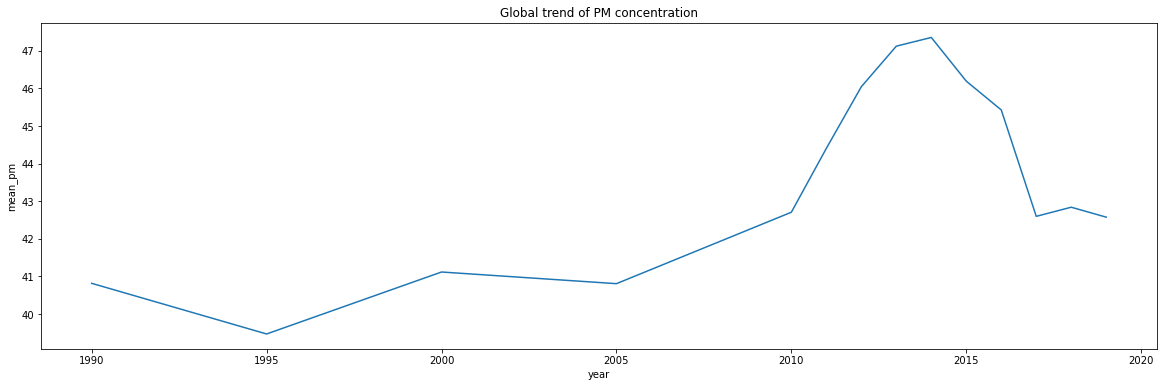

In [26]:
### A LINE GRAPH TO SHOW THE TREND OF GLOBAL MEAN PM CONCENTRATION
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=df_global, x='year', y='mean_pm')
plt.title ('Global trend of PM concentration')
plt.show()

## Q2 What is the trend of mean particulate matter in Ghana and how does it compare with the global trend?

### Selecting the data from Ghana from the entire dataset

In [27]:
df_gh=df[df['country']=='Ghana']
# df_gh

#### PLOT A LINE GRAPH OF GHANA MEAN PM CONCENTRATION TO SHOW THE TREND OF PM CONCENTRATION FROM 1990-2019

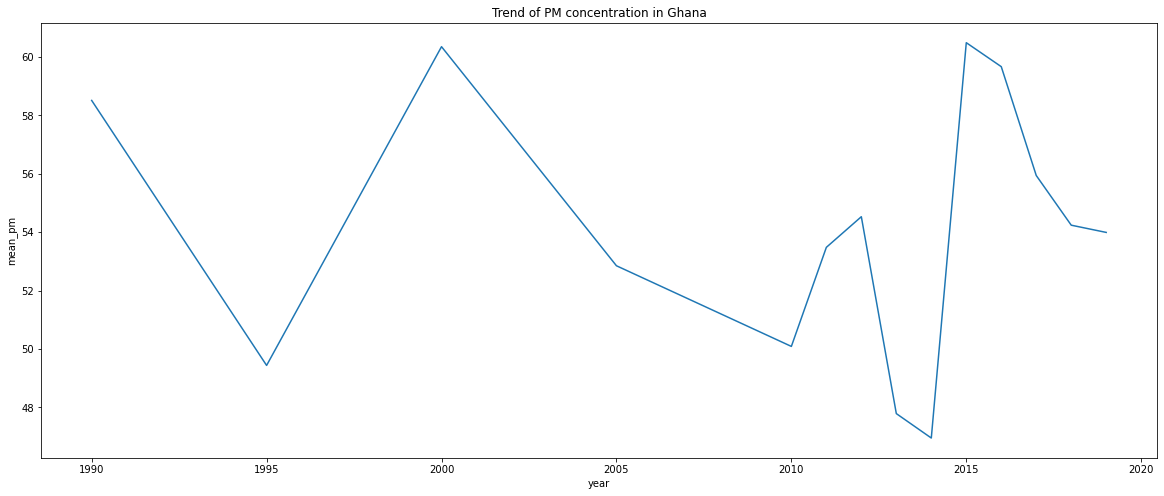

In [28]:
### A LINE GRAPH TO SHOW THE TREND OF GHANA MEAN PM CONCENTRATION
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_gh, x='year', y='mean_pm')
plt.title('Trend of PM concentration in Ghana')
plt.show();

### Selecting the  Global and Ghana data from the entire dataset

In [29]:
df_ggh=df.query("country == 'Global' or country== 'Ghana' ")
# df_ggh



#### PLOTTING  A LINEPLOT TO SHOW THE TREND OF MEAN PM CONCENTRATION FROM 1990-2019 IN GHANA AND GLOBALLY

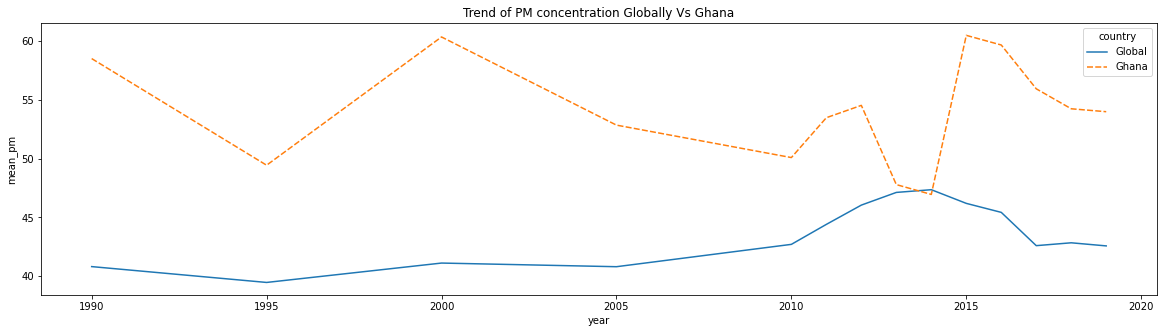

In [30]:
###  A LINEPLOT TO SHOW THE TREND OF MEAN PM CONCENTRATION FROM 1990-2019 IN GHANA AND GLOBALLY
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_ggh, x='year', y='mean_pm', style='country', hue="country")
plt.title ('Trend of PM concentration Globally Vs Ghana')
plt.show();

## Q3 Which African countries has the highest mean PM concentration?

### TOP 10 AFRICAN COUNTRIES WITH THE HIGHEST PM CONCENTRATION

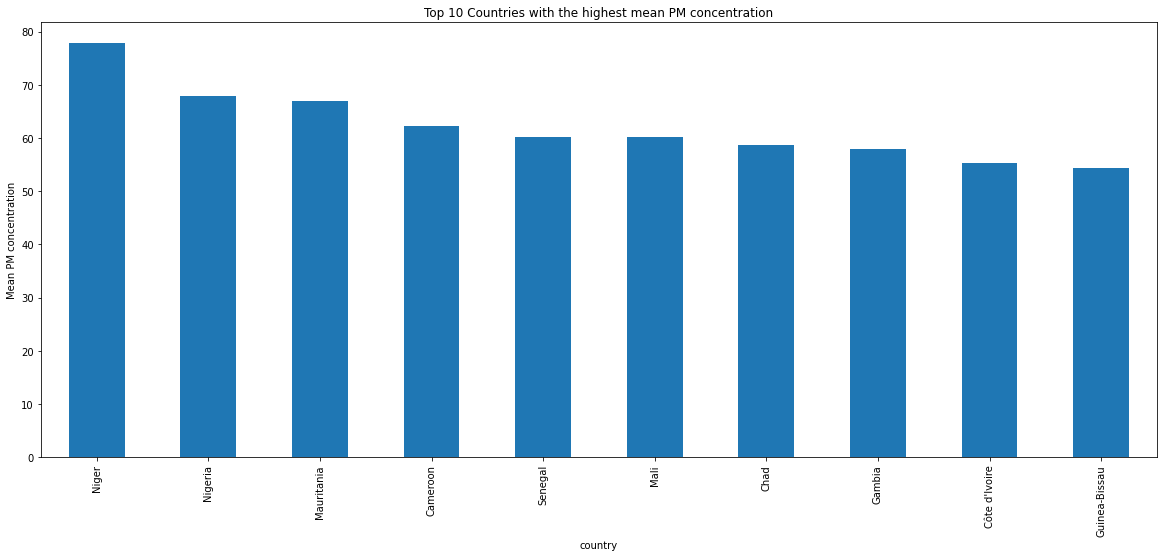

In [31]:
### TOP THE 10 AFRICAN COUNTRIES WITH THE HIGHEST PM CONCENTRATION
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('country')['mean_pm'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries with the highest mean PM concentration')
plt.ylabel('Mean PM concentration')
plt.show();


# CHOROPLETH MAP USING THE GEOPANDAS LIBRARY

In [32]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [37]:
country=df.country.unique()
# country

In [38]:
## SELECTING THE AFRICAN CONTINENT FROM THE DATA
african=world.query('continent=="Africa"')
# african

## SELECTING ONLY AFRICAN COUNTRIES

In [47]:
african_1=african[african['name'].isin(country)]
african_1.drop(columns=['pop_est','continent', 'iso_a3','gdp_md_est'], inplace=True)
african_1.rename(columns={'name':'country'}, inplace=True)
# african_1

## MERGING THE TWO DATAFRAMES, THE GEODATAFRAME WITH THE PM DATA

In [48]:
df_all=african_1.merge(df_pan, on=['country'], how='inner')
# df_all

## PLOTTING A CHOROPLETH MAP OF THE DISTRIBUTION OF THE MEAN PM CONCENTRATION IN THE AFRICAN CONTINENT

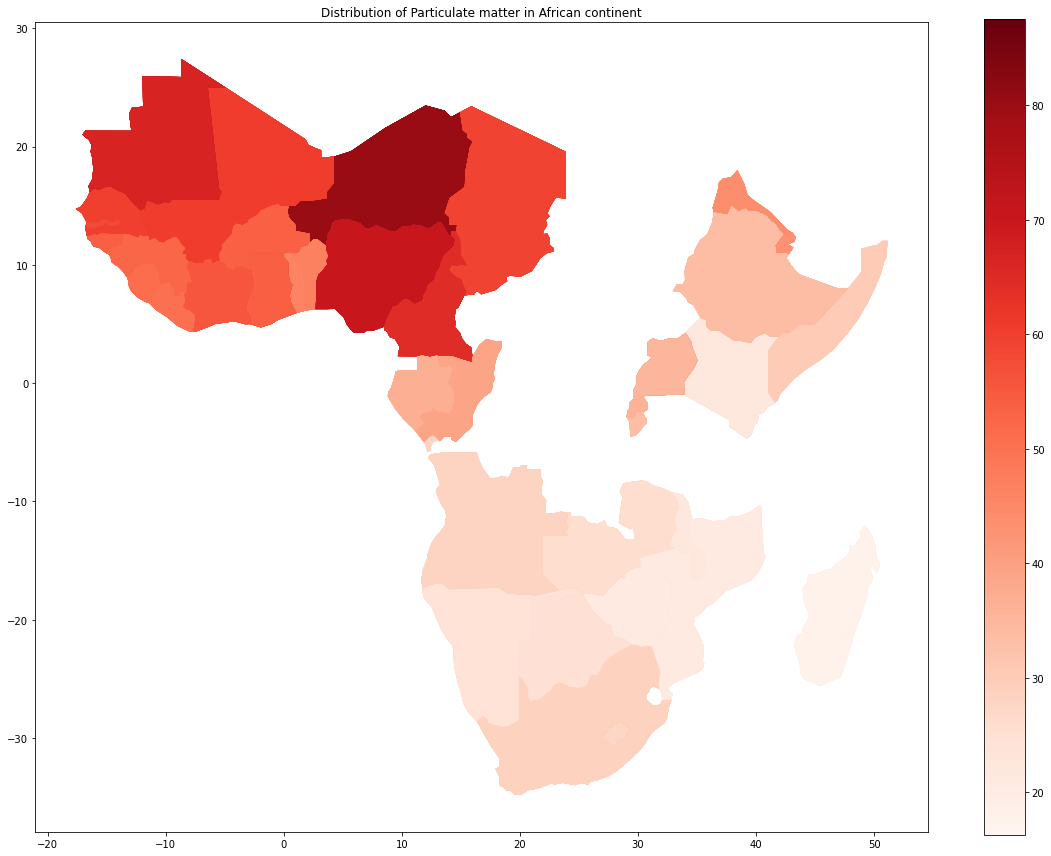

In [75]:
fig,ax=plt.subplots(figsize=(20,15))
df_all.plot(ax=ax, column='mean_pm',legend=True, cmap='Reds')
# legendChoro(title.txt='Particulate matter')
plt.title('Distribution of Particulate matter in African continent');

## Q4 Which are the top 10 populous African countries ?

### TOP 10 POPULOUS AFRICAN COUNTRIES

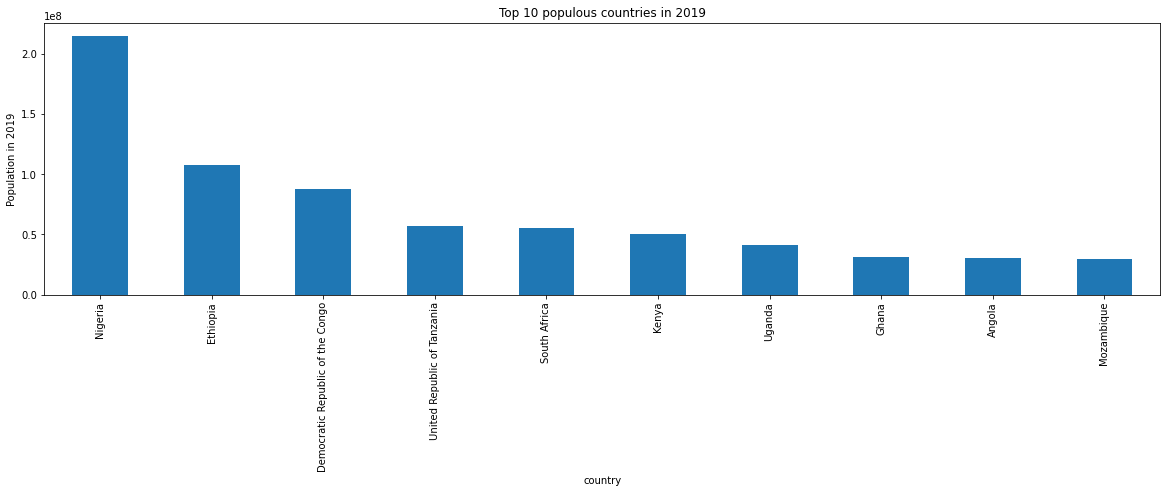

In [50]:
### TOP 10 POPULOUS COUNTRIES
fig, ax = plt.subplots(figsize=(20,5))
df.query('country !="Global"& year==2019 ').groupby('country')['population'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 populous countries in 2019')
plt.ylabel('Population in 2019')
plt.show();

## Q5 What is the trend of Global total annual mortality ?

#### PLOT A LINE GRAPH OF THE GLOBAL TOTAL DEATH TO SHOW THE TREND OF MORTALITY FROM 1990-2019

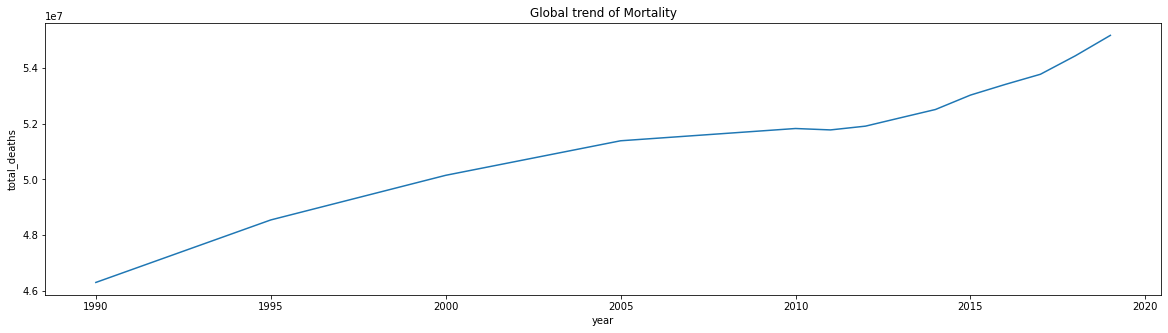

In [71]:
### A LINE GRAPH TO SHOW THE TREND OF GLOBAL MORTALITY 
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_global, x='year', y='total_deaths')
plt.title ('Global trend of Mortality')
plt.show()

## Q6 What is the relationship between a country population and mean particulate matter concentration

### PLOTTING AN UNSTACKED BAR-CHART OF THE MEAN PM CONCENTRATION AND THE POPULATION OF THE TOP 10 POPULOUS COUNTRIES IN 2019.

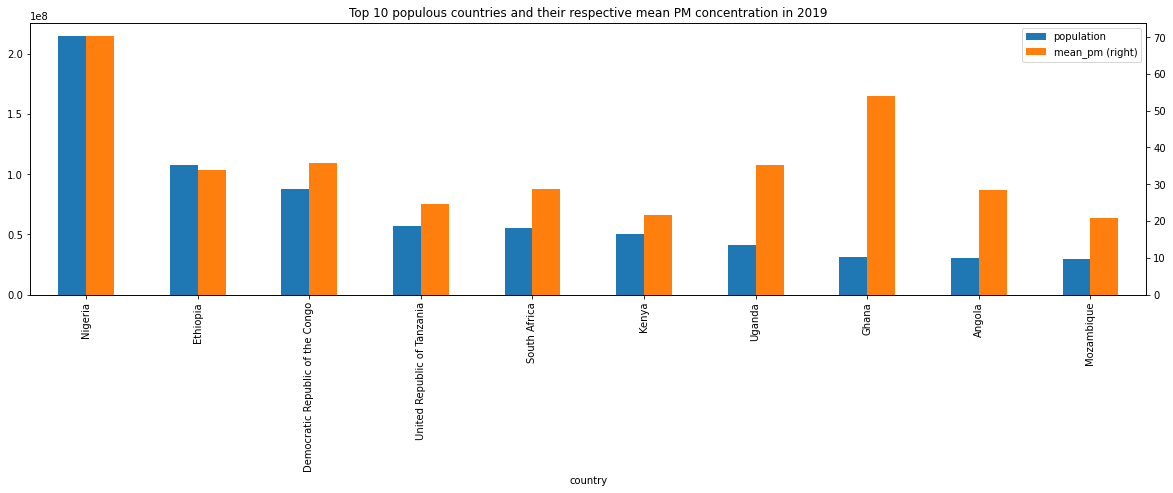

In [52]:
## THE TOP 10 POPULOUS  COUNTRIES AND THEIR RESPECTIVE MEAN PM CONCENTRATION IN 2019
fig, ax = plt.subplots(figsize=(20,5))
df.query('country !="Global"& year==2019 ').groupby('country')[['population', 'mean_pm']].mean().sort_values(by=['population'], ascending=False).head(10).plot(kind='bar', secondary_y='mean_pm', ax=ax)
plt.title ('Top 10 populous countries and their respective mean PM concentration in 2019')
plt.show();

### PM CONCENTRATION PER POPULATION OF EACH COUNTRY

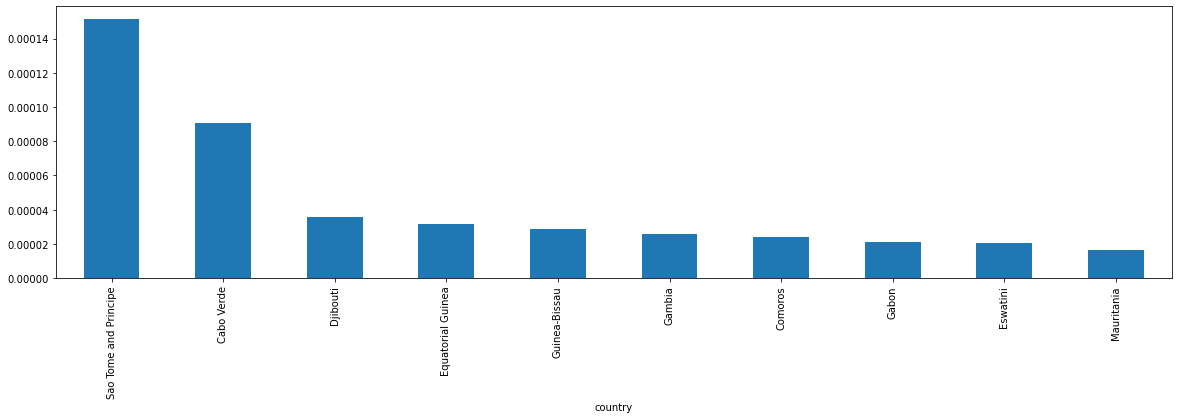

In [53]:
## PM per population.

df_ration=df.query('country !="Global"& year==2019 ').groupby('country')[['population', 'mean_pm']].mean()

fig, ax=plt.subplots(figsize=(20, 5))
df_ratio=df_ration['mean_pm']/df_ration['population']
df_ratio.sort_values(ascending=False).head(10).plot(kind='bar', ax=ax);

### REMOVING EXTREME VALUES ie GLOBAL ENTERIES

In [54]:
### Refined data , exclude global data 

df_1=df.query('country!="Global"')

### CORRELATION BETWEEN POPULATION AND MEAN PM CONCENTRATION

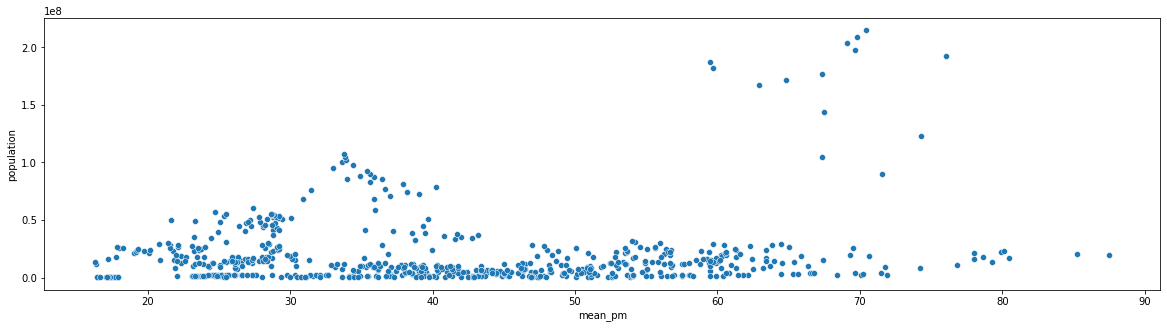

In [62]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='mean_pm', y=df_1.population, data=df_1)
plt.show();

In [56]:
## CORRELATION COEFFICIENT
coef= df.mean_pm.corr(df_1.population)
coef

0.11714791624634706

## Q7 What is the relationship between a country mean particulate matter concentration and total mortality?

### TOP 10 AFRICAN COUNTRIES HIGHEST MEAN PM VALUE AND TOTAL DEATHS

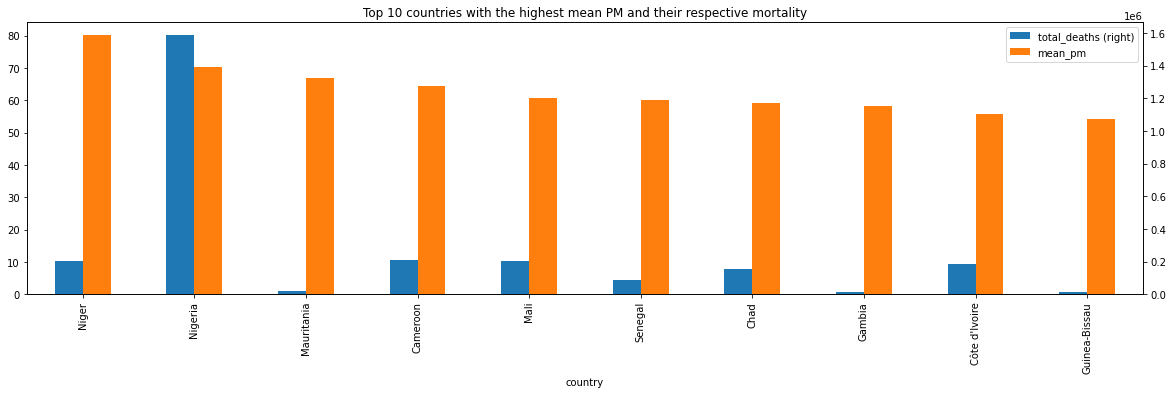

In [58]:
fig, ax = plt.subplots(figsize=(20,5))
df.query('country !="Global"& year==2019 ').groupby('country')[['total_deaths', 'mean_pm']].mean().sort_values(by=['mean_pm'], ascending=False).head(10).plot(kind='bar', secondary_y='total_deaths', ax=ax)
plt.title ('Top 10 countries with the highest mean PM and their respective mortality')
plt.show();

### CORRELATION BETWEEN MEAN PM CONCENTRATION AND TOTAL MORTALITY 

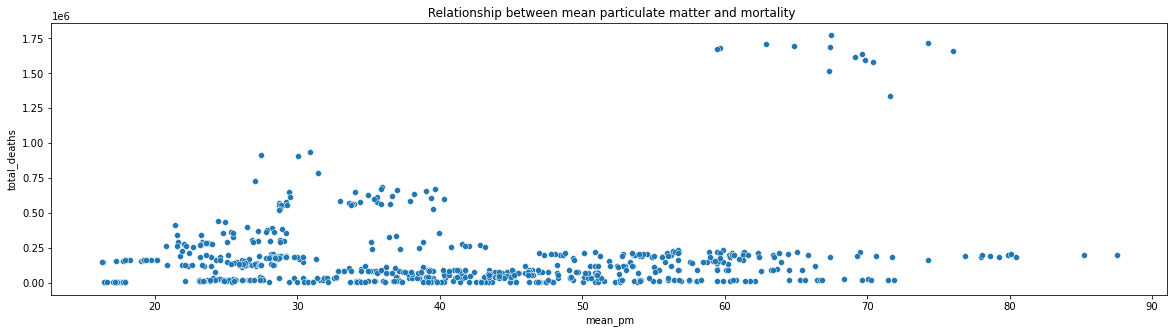

In [60]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='mean_pm', y=df_1.total_deaths, data=df_1)
plt.title (" Relationship between mean particulate matter and mortality")
plt.show();

In [ ]:
coef=df_1.mean_pm.corr(df_1.total_deaths)
coef
### THIS GIVES AN EVEN HIGHER CORRELATION COMPARED TO WHEN YOU USE THE LOG TRANSFORMED DATA

### A HEATMAP SHOWING THE RELATIONSHIP BETWEEN ALL THE VARIABLES

In [63]:
## SELECTING COLUMNS THAT HAVE FLOAT VALUES

heat_map=df.select_dtypes('float').corr()
heat_map

,mean_pm,population,total_deaths
mean_pm,1.000000,0.027554,0.028216
population,0.027554,1.000000,0.998053
total_deaths,0.028216,0.998053,1.000000


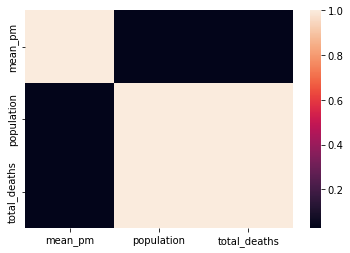

In [64]:
sns.heatmap(heat_map);

## WORD CLOUD OF HEALTH EFFECTS OF AIR POLLUTION

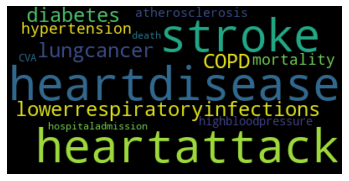

In [70]:
from wordcloud import WordCloud
words= ('heartdisease heartattack stroke lowerrespiratoryinfections lungcancer diabetes COPD hypertension mortality atherosclerosis highbloodpressure hospitaladmission death CVA ')
## CREATING A BAG OF WORDS
words.split(" ")
### CREATING A WORDCLOUD INSTANCE
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(words)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### The North and West African countries tend to have the highest mean PM concentration compared to the South 

# CONCLUSION 

> **Q1:** The global trend of PM concentration seems to be on a steady rise since the 1990s, there was a however a sharp rise starting in 2010  and peaking in 2013-2014, then it begun to decline again to a new baseline in 2017.  Generally there is a progressive increase in the amount of particulate matter generated globally over the years despite the recent policies and call to action on air pollution and climate change in general. 

> **Q2:** Unlike the trend seen with the global PM concentration, when it comes to Ghana, there seems not to be a well defined pattern, but from the chart, there is a peak in 2000 and again in the 2016. 

> But comparing the mean PM concentration in Ghana with the global values, it is higher in Ghana. That is the case in most developing countries. One possible explanation is the lack of clean energy, most people use fire wood and its derivatives in cooking, bushfires are rappant, traffic pollution is through the roof as most vehicles on the road are not roadworthy. 

> **Q3:** Niger has the highest mean PM concentration in Africa followed by Nigeria, the rest as shown by the chart. As shown on the choropleth map, West and North African countries tend to have some of the highest mean PM concentration in Africa.

> **Q4:** Nigeria is by far the most populated country in Africa, followed by Ethiopia and the rest as depicted by the chart. 

> **Q5:** The global mortality from the chart tend to have a sigmoid pattern, but generally there is an  upward trend, this is not surprising as the global population continue to rise, there will be a corresponding increase in mortality, the Malthusian theory is true to some extend [link](https://study.com/learn/lesson/malthusian-theory-of-population-growth-summary-importance.html)

> **Q6:** There seems to be a weak correlation (correlation coefficient of 0.12) between the population of a country and its mean PM concentration, as can be seen from the mean PM concentration per population chart,  Sao Tome and Principe tend to have some of the highest density of PM per population, despite its small population.

>**Q7:** There is a weak correlation (correlation coefficient of 0.42) between the mean PM concentration of a country and the total mortality. 
